LEVEL 19 — DATABASE DESIGN

LEVEL 19.0 — WHAT IS A DATABASE? (ABSOLUTE ZERO)

A database is like Excel sheets, but:
- Faster
- Safer
- Used by backend

Each sheet = table

Each row = one record

Each column = one property

LEVEL 19.1 — WHAT TABLES DO WE NEED?

From our Python project, we already know the data:
- Users
- Restaurants
- Food items
- Orders
- order items
- Delivery partners

These become tables.

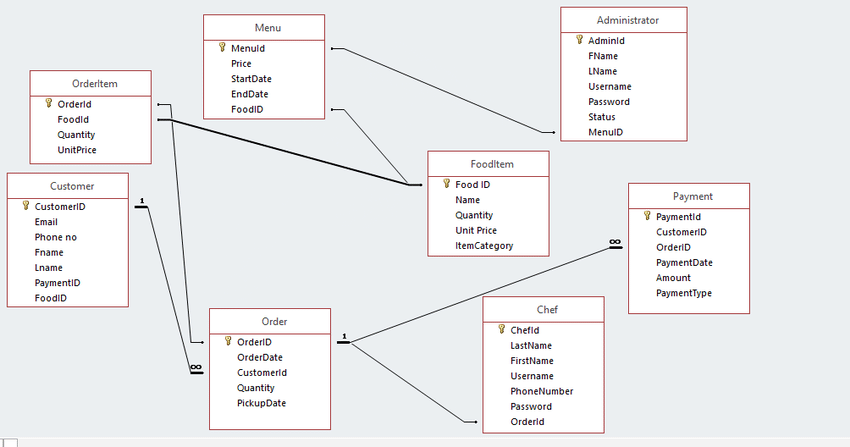
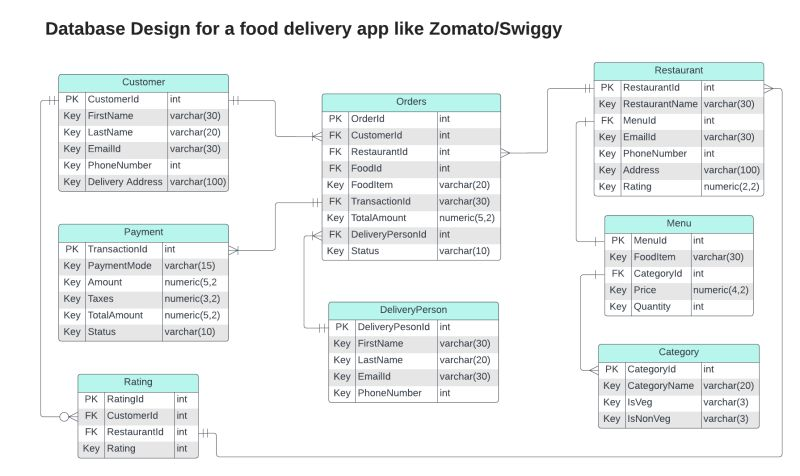
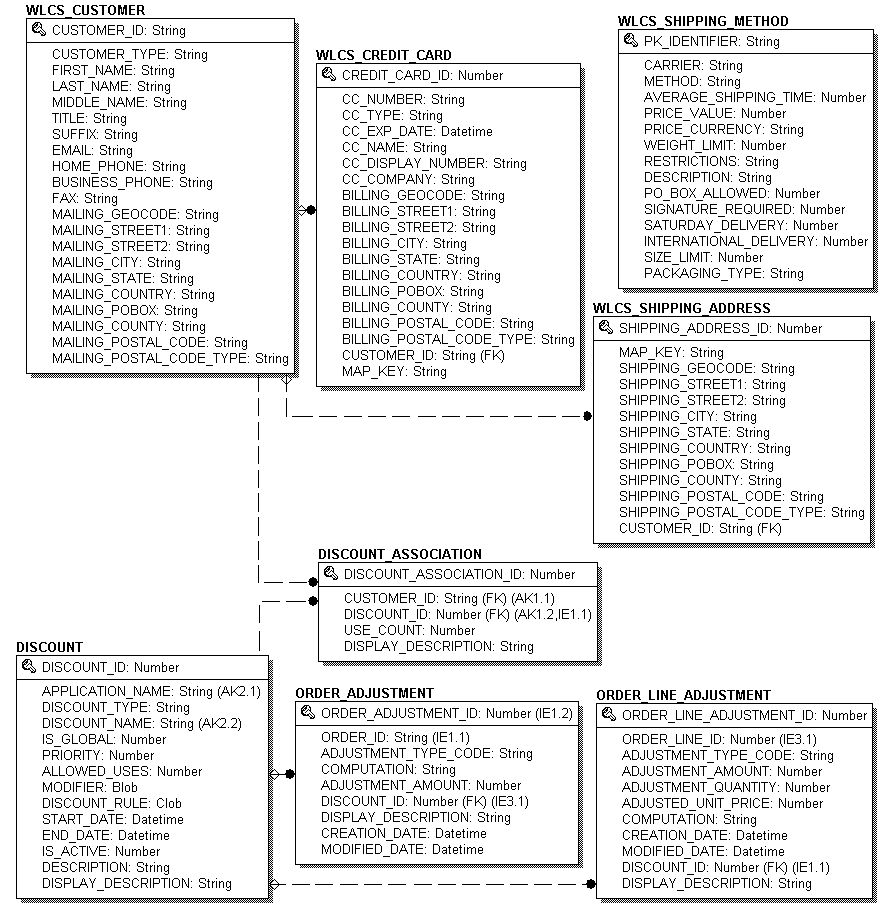

LEVEL 19.2 — USERS TABLE 

What defines a user?
- id
- name
- phone

In [ ]:
#sql
CREATE TABLE users (
    user_id INT PRIMARY KEY,
    name VARCHAR(100),
    phone VARCHAR(15)
);

LEVEL 19.3 — RESTAURANTS TABLE

Restaurant has:
- id
- name
- location

In [ ]:
CREATE TABLE restaurants (
    restaurant_id INT PRIMARY KEY,
    name VARCHAR(100),
    location VARCHAR(100)
);

LEVEL 19.4 — FOOD ITEMS TABLE (IMPORTANT)

Food belongs to one restaurant

So we connect tables.

This connection is called FOREIGN KEY.

In [ ]:
CREATE TABLE food_items (
    food_id INT PRIMARY KEY,
    name VARCHAR(100),
    price INT,
    restaurant_id INT,
    FOREIGN KEY (restaurant_id) REFERENCES restaurants(restaurant_id)
);

Each food item must belong to a restaurant

This prevents invalid data

LEVEL 19.5 — ORDERS TABLE (CORE TABLE)

Order connects:
- user
- restaurant
- status
- time

In [ ]:
#this table is heart of system.
CREATE TABLE orders (
    order_id INT PRIMARY KEY,
    user_id INT,
    restaurant_id INT,
    status VARCHAR(50),
    created_at TIMESTAMP,
    FOREIGN KEY (user_id) REFERENCES users(user_id),
    FOREIGN KEY (restaurant_id) REFERENCES restaurants(restaurant_id)
);

LEVEL 19.6 — ORDER ITEMS TABLE (VERY IMPORTANT)
WHY?

One order can have multiple food items.

❌ Don’t store food list in orders table
✅ Create separate table

In [ ]:
# ➡️ Many-to-Many relationship
CREATE TABLE order_items (
    order_item_id INT PRIMARY KEY,
    order_id INT,
    food_id INT,
    quantity INT,
    FOREIGN KEY (order_id) REFERENCES orders(order_id),
    FOREIGN KEY (food_id) REFERENCES food_items(food_id)
);

LEVEL 19.7 — DELIVERY PARTNERS TABLE

In [ ]:
CREATE TABLE delivery_partners (
    partner_id INT PRIMARY KEY,
    name VARCHAR(100),
    is_available BOOLEAN
);

LEVEL 19.8 — ASSIGN DELIVERY TO ORDER

One delivery partner handles one order at a time.

In [ ]:
ALTER TABLE orders
ADD partner_id INT,
ADD FOREIGN KEY (partner_id) REFERENCES delivery_partners(partner_id);

# Connecting Python Classes to Database Tables (Backend Mapping)

This is a **core backend engineering concept**:  
**Object-Oriented Code ↔ Relational Database Tables**

Backend engineers design **models (classes)** that directly map to **database tables**.

---

## 1️⃣ Concept Overview

| Python Class        | Database Table        |
|---------------------|-----------------------|
| `User`              | `users`               |
| `Restaurant`        | `restaurants`         |
| `Food`              | `food_items`          |
| `Order`             | `orders`              |
| `Order.food_list`   | `order_items`         |
| `DeliveryPartner`   | `delivery_partners`   |

Each **class = table**  
Each **object = row**  
Each **attribute = column**

---

## 2️⃣ Why This Mapping Exists

Backend systems need to:
- Store data permanently
- Retrieve data efficiently
- Maintain relationships
- Enforce constraints

Databases do this best, while **Python classes** provide clean structure and logic.

This bridge is called **ORM (Object Relational Mapping)**.

---

## 3️⃣ Example: User

### Python Class
```python
class User:
    def __init__(self, id, name, email):
        self.id = id
        self.name = name
        self.email = email

LEVEL 19.9 — BASIC REAL QUERIES (VERY IMPORTANT)

In [ ]:
# Get user orders
SELECT * FROM orders WHERE user_id = 1;

In [ ]:
# Get items in an order
SELECT f.name, f.price, oi.quantity
FROM order_items oi
JOIN food_items f ON oi.food_id = f.food_id
WHERE oi.order_id = 101;

In [ ]:
# Update order status
UPDATE orders
SET status = 'DELIVERED'
WHERE order_id = 101;

SYSTEM DESIGN KEYWORDS YOU NOW UNDERSTAND
- Primary key
- Foreign key
- Normalization
- One-to-many
- Many-to-many
- Data integrity

now i can:
- Design database
- Connect backend logic to DB
- Explain schema in interview
- Build real systems